In [1]:
#importing required library to perform EDA.
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("price_train.csv")
data.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,...,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,...,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,...,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,...,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,...,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 25 columns):
X1                              3466 non-null int64
id                              3466 non-null int64
host_is_superhost               3466 non-null bool
host_response_rate              3466 non-null object
host_response_time              3466 non-null object
host_listings_count             3466 non-null int64
host_identity_verified          3466 non-null bool
accommodates                    3466 non-null int64
neighbourhood_group_cleansed    3466 non-null object
property_type                   3466 non-null object
room_type                       3466 non-null object
latitude                        3466 non-null float64
longitude                       3466 non-null float64
guests_included                 3466 non-null int64
bathrooms                       3466 non-null float64
bedrooms                        3466 non-null int64
beds                            3466 non-null int64


In [35]:
#find minimum, maximum and average price for listing
min_price = data['price'].min()
max_price = data['price'].max()
mean_price = data['price'].mean()

print('Minimum price per listing is %d$.' % (min_price))
print('Maximum price per listing is %d$' % (max_price))
print('Average price per listing is %d$.' % (mean_price))

Minimum price per listing is 0$.
Maximum price per listing is 1650$
Average price per listing is 159$.


In [4]:
data.drop(['neighbourhood_group_cleansed', 'bed_type','amenities'], axis=1, inplace=True)
data.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,property_type,room_type,...,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Apartment,Entire home/apt,...,4,2.0,2,2,$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,House,Entire home/apt,...,1,1.0,0,1,$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Guest suite,Entire home/apt,...,2,1.0,1,2,$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,House,Private room,...,1,1.0,1,1,$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,House,Entire home/apt,...,6,2.5,3,3,$99.00,2,12,False,flexible,$242.00


In [5]:
data.describe()

,X1,id,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,minimum_nights,maximum_nights
count,3466.000000,3.466000e+03,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.00000,3466.000000,3466.000000
mean,4501.088575,1.843582e+07,67.848817,3.761108,47.625409,-122.334011,2.114541,1.317802,1.378823,1.98240,3.328621,595.884305
std,2483.133761,8.885055e+06,211.743448,2.446790,0.045099,0.031438,1.836108,0.672634,1.051297,1.55458,10.540059,530.773958
min,1.000000,4.291000e+03,0.000000,1.000000,47.496037,-122.419637,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,2328.500000,1.197427e+07,1.000000,2.000000,47.605720,-122.353609,1.000000,1.000000,1.000000,1.00000,1.000000,30.000000
50%,4681.500000,2.024816e+07,2.000000,3.000000,47.620930,-122.332553,1.000000,1.000000,1.000000,1.00000,2.000000,365.000000
75%,6696.750000,2.546066e+07,10.750000,5.000000,47.658976,-122.312695,2.000000,1.000000,2.000000,2.00000,2.000000,1125.000000
max,8456.000000,3.223951e+07,1596.000000,28.000000,47.733955,-122.232314,16.000000,8.000000,8.000000,20.00000,330.000000,1825.000000


In [6]:
#Checking for null values
data.isnull().sum()

X1                        0
id                        0
host_is_superhost         0
host_response_rate        0
host_response_time        0
host_listings_count       0
host_identity_verified    0
accommodates              0
property_type             0
room_type                 0
latitude                  0
longitude                 0
guests_included           0
bathrooms                 0
bedrooms                  0
beds                      0
cleaning_fee              0
minimum_nights            0
maximum_nights            0
instant_bookable          0
cancellation_policy       0
price                     0
dtype: int64

In [7]:
data['host_response_rate'] = data['host_response_rate'].astype(str)
data['cleaning_fee'] = data['cleaning_fee'].astype(str)
data['price'] = data['price'].astype(str)

In [8]:
data['cleaning_fee'] = data['cleaning_fee'].str.replace("[$,]", "").astype("float")
data['price'] = data['price'].str.replace("[$, ]", "").astype("float")
data['host_response_rate'] = data['host_response_rate'].str.replace("%", "").astype("float")

In [9]:
data['superhost']=np.where(data['host_is_superhost']=='True',1,0)
del data['host_is_superhost']

C:\Users\Raktim Mitra\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [10]:
data['verify_identity']=np.where(data['host_identity_verified']=='True',1,0)
del data['host_identity_verified']

In [11]:
data2= pd.get_dummies(data=data, columns=['room_type', 'cancellation_policy','property_type', 'host_response_time'])
data2.head()

,X1,id,host_response_rate,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,...,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,property_type_Yurt,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,5460,22146017,99.0,521,5,47.612163,-122.338239,4,2.0,2,...,0,0,0,0,0,0,0,0,0,1
1,4143,18638163,100.0,1,2,47.640827,-122.355248,1,1.0,0,...,0,0,0,0,0,0,0,0,0,1
2,5802,22734110,100.0,1,4,47.549007,-122.273951,2,1.0,1,...,0,0,0,0,0,0,0,0,0,1
3,776,3946674,90.0,1,2,47.601922,-122.307979,1,1.0,1,...,0,0,0,0,0,0,0,0,1,0
4,6064,23610186,100.0,4,8,47.552311,-122.293409,6,2.5,3,...,0,0,0,0,0,0,0,0,0,1


In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 57 columns):
X1                                                 3466 non-null int64
id                                                 3466 non-null int64
host_response_rate                                 3466 non-null float64
host_listings_count                                3466 non-null int64
accommodates                                       3466 non-null int64
latitude                                           3466 non-null float64
longitude                                          3466 non-null float64
guests_included                                    3466 non-null int64
bathrooms                                          3466 non-null float64
bedrooms                                           3466 non-null int64
beds                                               3466 non-null int64
cleaning_fee                                       3466 non-null float64
minimum_nights                 

In [13]:
# drop non-numeric variables from data and add the dummies
df3=data.drop(columns=['room_type', 'cancellation_policy','property_type','host_response_time'],axis=1)
df3 = pd.merge(df3,data2)
df3.head()

,X1,id,host_response_rate,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,...,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,property_type_Yurt,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,5460,22146017,99.0,521,5,47.612163,-122.338239,4,2.0,2,...,0,0,0,0,0,0,0,0,0,1
1,4143,18638163,100.0,1,2,47.640827,-122.355248,1,1.0,0,...,0,0,0,0,0,0,0,0,0,1
2,5802,22734110,100.0,1,4,47.549007,-122.273951,2,1.0,1,...,0,0,0,0,0,0,0,0,0,1
3,776,3946674,90.0,1,2,47.601922,-122.307979,1,1.0,1,...,0,0,0,0,0,0,0,0,1,0
4,6064,23610186,100.0,4,8,47.552311,-122.293409,6,2.5,3,...,0,0,0,0,0,0,0,0,0,1


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3466 entries, 0 to 3465
Data columns (total 57 columns):
X1                                                 3466 non-null int64
id                                                 3466 non-null int64
host_response_rate                                 3466 non-null float64
host_listings_count                                3466 non-null int64
accommodates                                       3466 non-null int64
latitude                                           3466 non-null float64
longitude                                          3466 non-null float64
guests_included                                    3466 non-null int64
bathrooms                                          3466 non-null float64
bedrooms                                           3466 non-null int64
beds                                               3466 non-null int64
cleaning_fee                                       3466 non-null float64
minimum_nights                 

## Here I am creating a histogram according to the price range and count of listings most of the price are in the range of 250 dollars.

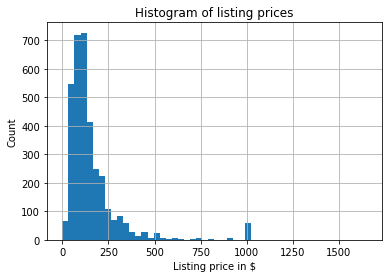

In [25]:

import matplotlib.pyplot as plt
%matplotlib inline
df3['price'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices')
plt.show()

## Creating a scatter plot for to understand that how bed room count affect the price range.

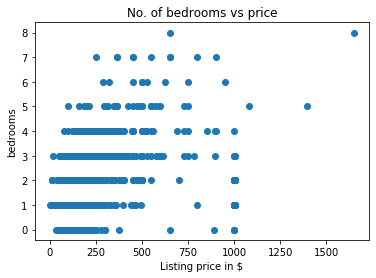

In [26]:
plt.scatter(df3['price'],df3['bedrooms'])
plt.ylabel('bedrooms')
plt.xlabel('Listing price in $')
plt.title('No. of bedrooms vs price')
plt.show()

<IPython.core.display.Javascript object>


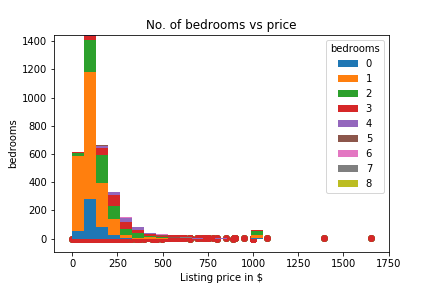

Text(0.5, 0, 'Listing price in $')

In [20]:
df3.pivot(columns = 'bedrooms',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')

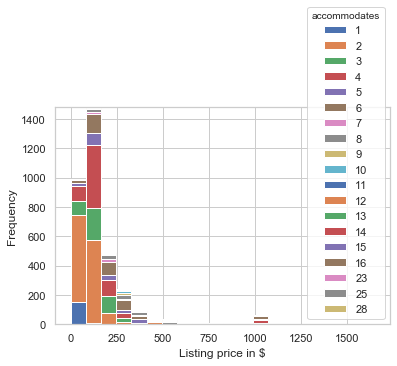

In [146]:
df3.pivot(columns = 'accommodates',values = 'price').plot.hist(stacked = True,bins=20)
plt.xlabel('Listing price in $')
plt.show()

Text(0.5, 0, 'Listing price in $')

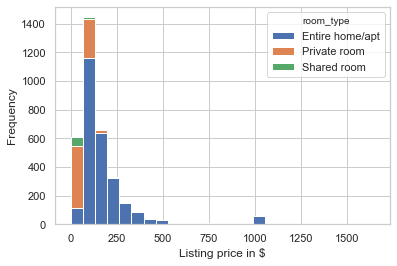

In [147]:
data.pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=25)
plt.xlabel('Listing price in $')

In [148]:
cols = ['host_response_rate','accommodates',
       'bathrooms','bedrooms','beds','price']

C:\Users\Raktim Mitra\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


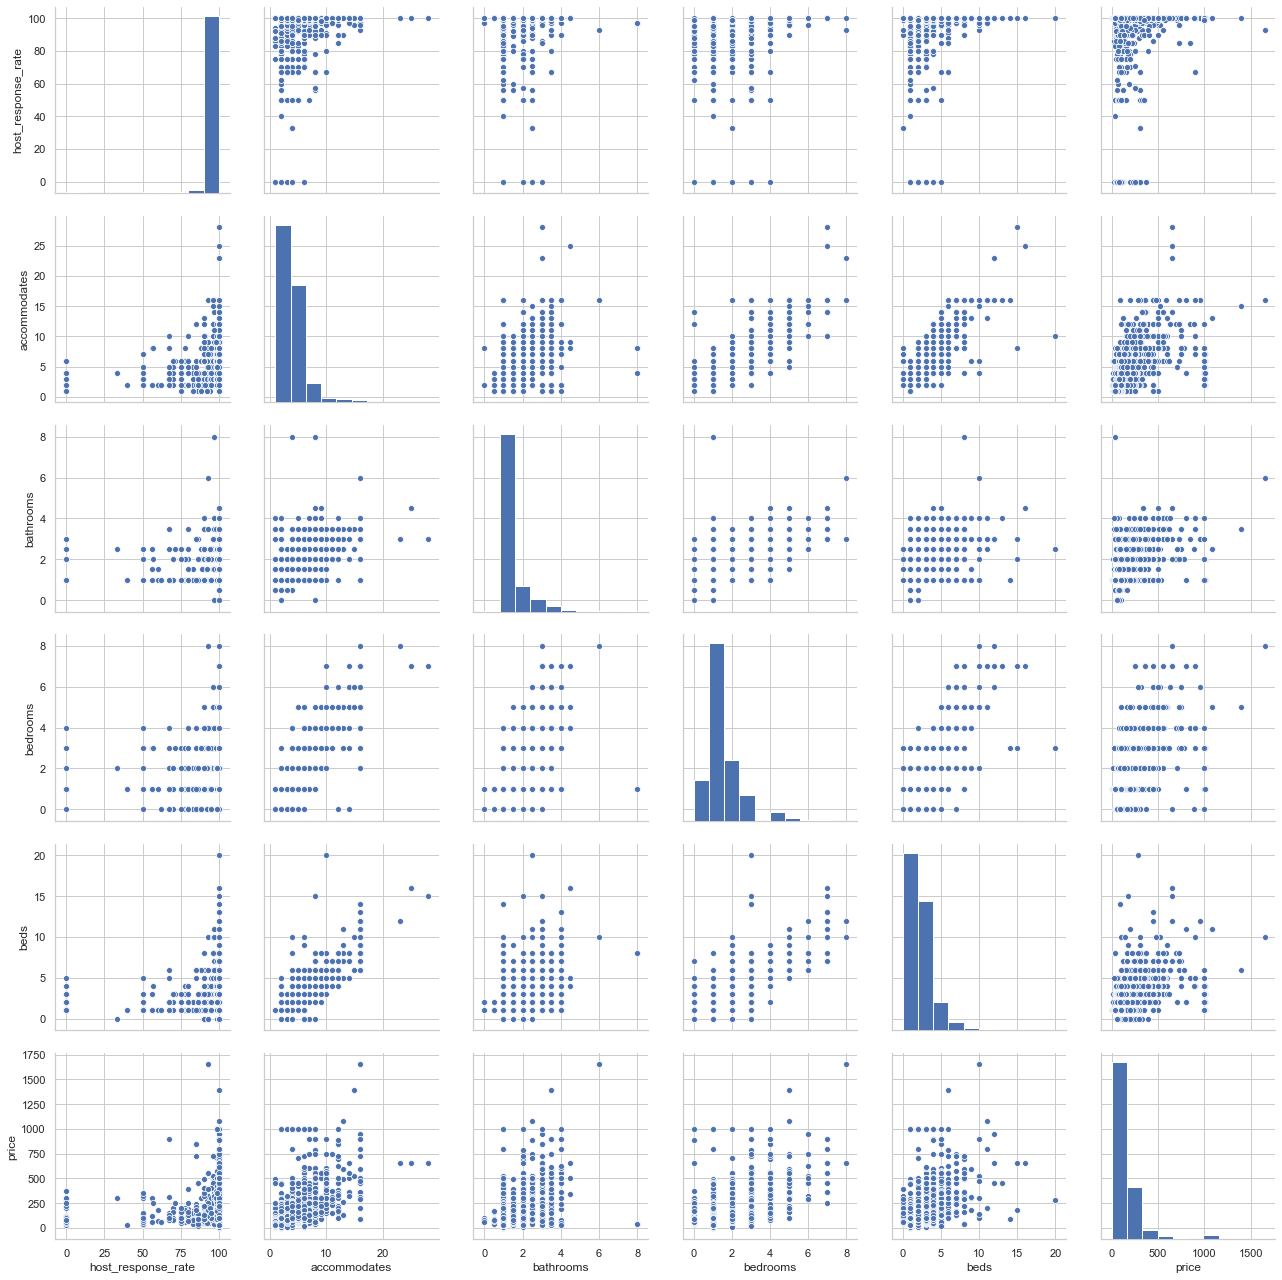

In [149]:
import seaborn as sns
sns.set(style = 'whitegrid',context = 'notebook')
sns.pairplot(df3[cols],size=3)
plt.show()

## Using heatmap i am trying to find the correlation between the features.

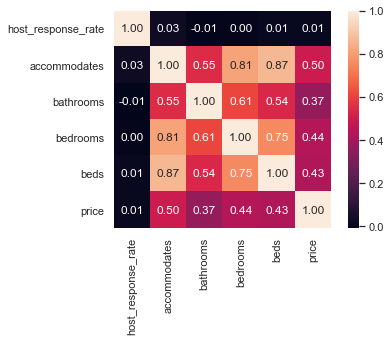

In [78]:
# heatmap
corrs = np.corrcoef(df3[cols].values.T)
sns.set(font_scale=1)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols)

In [37]:
#prepare train and test datasets for modelling
TEST_SIZE = 0.3
RAND_STATE = 42

X = data.drop(columns = 'price')
y = data[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [38]:
x.train.shape

(2773, 56)

I am using linear regression model because as we can see from our data we are trying to predict the listing price which is a continuous value and we know that linear regression model is used when we have continuous data to predict.

In [49]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)


print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 9309.764, test: 9159.638
R^2 train: 0.653, test: 0.548


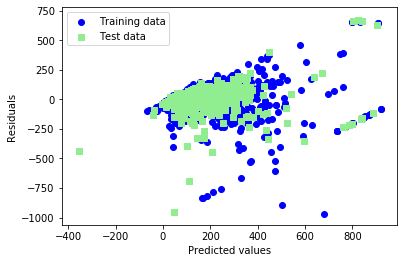

In [50]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()


In [46]:

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)


print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

C:\Users\Raktim Mitra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 train: 0.965, test: 0.736


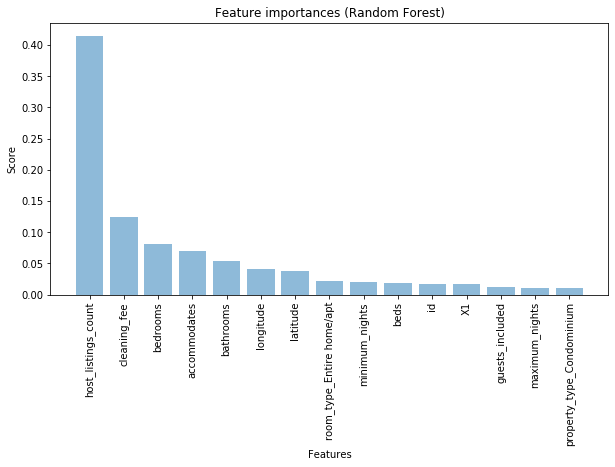

In [42]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

#plot feature importances
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')
plt.show()


In [43]:
#train XGBoost model
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)


print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

R^2 train: 0.956, test: 0.749


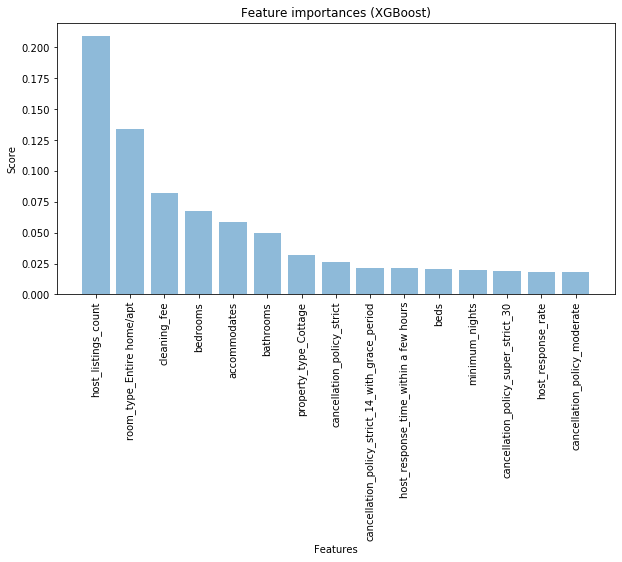

In [44]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances for top 15 features
features = xgb_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = xgb_feature_importances['score'][:15]
 
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (XGBoost)')

 
plt.show()

Conclusion
In this analysis we tried to understand what influences the reservation prices with the help of AirBnB data for Seattle. Of course, the results may be different for each city, but current approach still can be used for other cities' data. I tried few algorithm as you see from the result XGBoost model from better than other on the test data.